In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("Housing.csv")
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.shape

(545, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
empty_cell=data.isnull().sum()
print(empty_cell)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
heatmap=data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

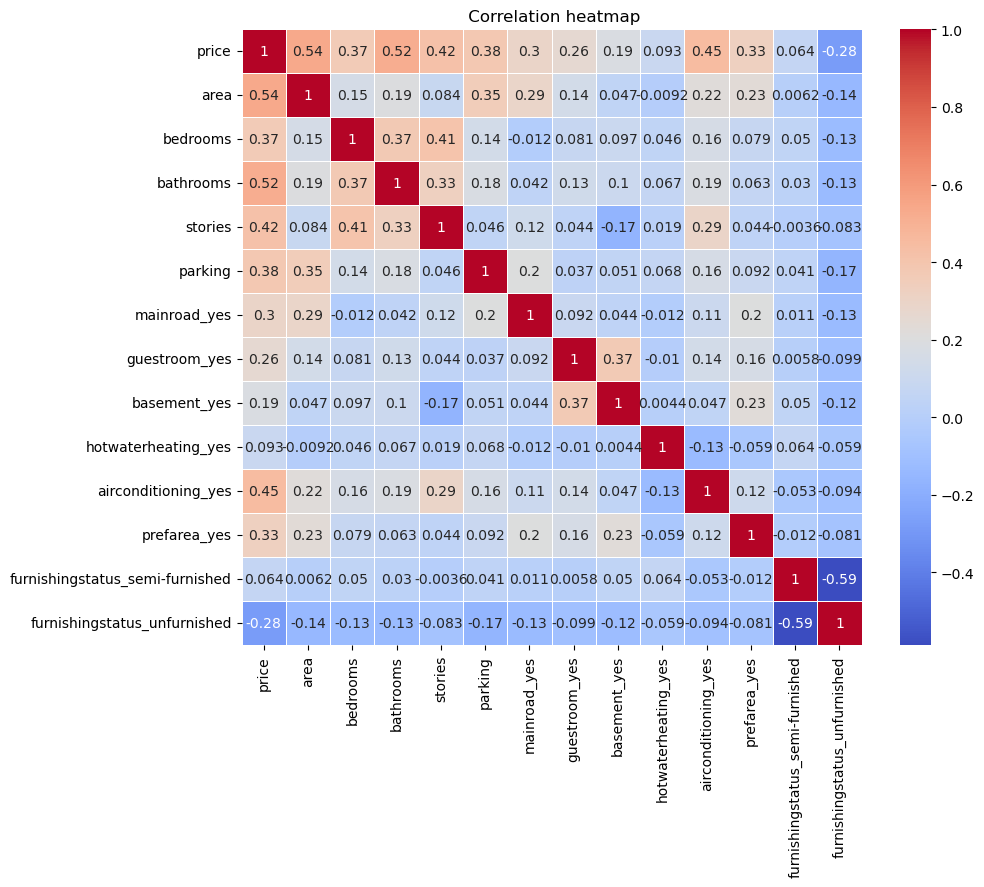

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmap,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title(" Correlation heatmap")
plt.show


In [13]:
X = data.drop("price", axis=1)  # assuming 'price' is the target column
y = data["price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True


In [16]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,5900,4,2,2,1,False,False,True,False,False,False,False,True
77,6500,3,2,3,0,True,False,False,False,True,True,False,False
360,4040,2,1,1,0,True,False,False,False,False,False,True,False
90,5000,3,1,2,0,True,False,False,False,True,False,True,False
493,3960,3,1,1,0,True,False,False,False,False,False,False,False


In [17]:
y_train.head()

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
Name: price, dtype: int64

In [18]:
y_test.head()

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)
print(y_pred)

[5164653.90033967 7224722.29802166 3109863.24240338 4612075.32722559
 3294646.25725955 3532275.09556558 5611774.56836476 6368145.98732718
 2722856.95689985 2629405.61585782 9617039.5031558  2798087.30447888
 3171096.76847063 3394639.09125528 3681088.65424275 5263187.74621485
 3035963.47612384 4786122.8004005  4349551.9200572  3572362.09930451
 5774875.21395649 5886993.57919883 2730836.19518458 4727316.47323635
 5244847.52716801 7555324.21605603 3220790.84680268 5191898.79934207
 8143726.91009786 3398814.09825035 6490693.05027925 3315105.9074781
 6708457.36761326 4201738.21071676 3557571.06735186 5836974.50478626
 4808660.67448475 4362878.73613261 3191242.95701508 4596554.93225238
 4566042.86048411 3517779.52374148 7205844.79365835 3983597.27861103
 3749338.70271056 4274731.09125895 6757442.10783741 4037320.43665851
 3769334.90397126 3417627.44377156 7268416.67644611 2802534.35431384
 4341750.61420452 4516422.15345642 3679997.65037847 2678959.06481152
 7498029.17782458 2920366.45493167 

In [22]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ypre)
print("MSE:", mse)


MSE: 1754318687330.6643


In [29]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(" Accuracy Metrics")
print(f"🔸 R² Score       : {r2:.4f}")
print(f"🔸 RMSE           : {rmse:.2f}")
print(f"🔸 MAE            : {mae:.2f}")

 Accuracy Metrics
🔸 R² Score       : 0.6529
🔸 RMSE           : 1324506.96
🔸 MAE            : 970043.40


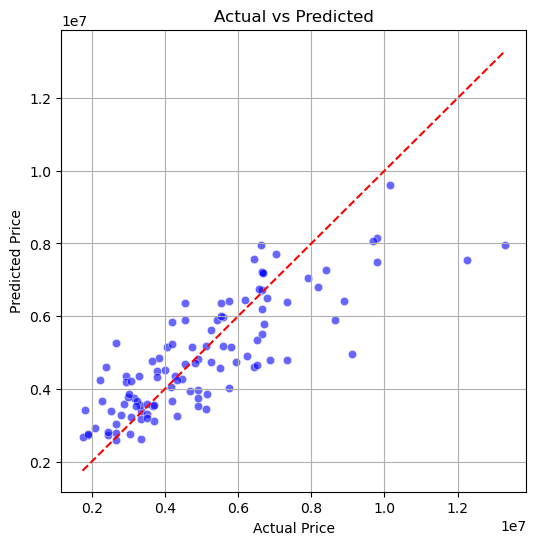

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

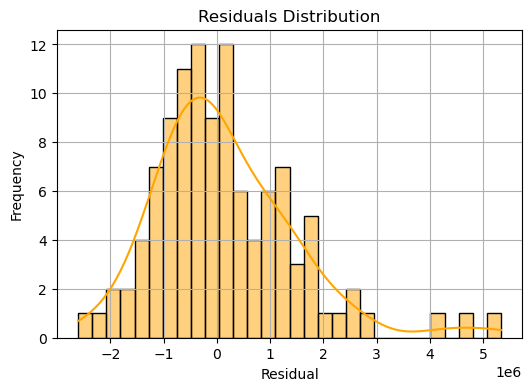

In [31]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()